In [1]:
import fastf1 as ff1
from fastf1 import plotting
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Team and drivers colors
team_colors = {
    'Red Bull Racing': '#1E41FF',    # Blue
    'Ferrari': '#DC0000',            # Red
    'McLaren': '#FF8700',            # Orange
    'Alpine': '#FF69B4',             # Cyan
    'Aston Martin': '#007A33',       # Green
    'Kick Sauber': '#9B0000',              # Dark Red
    'Williams': '#FFFFFF',           # White
    'RB': '#212B7E',         # Dark Blue
    'Haas': '#595959',               # Dark Gray
    'Mercedes': '#00D2BE',           # Silver
}

driver_color = {
    'LEC': 'Ferrari',
    'SAI': 'Ferrari',
    'VER': 'Red Bull Racing',
    'PER': 'Red Bull Racing',
    'PIA': 'McLaren',
    'NOR': 'McLaren',
    'RUS': 'Mercedes',
    'HAM': 'Mercedes',
    'TSU': 'RB',
    'RIC': 'RB',
    'HUL': 'Haas F1 Team',
    'MAG': 'Haas F1 Team',
    'OCO': 'Alpine',
    'GAS': 'Alpine',
    'ALO': 'Aston Martin',
    'STR': 'Aston Martin',
    'ALB': 'Williams',
    'SAR': 'Williams',
    'BOT': 'Kick Sauber',
    'ZHO': 'Kick Sauber',
}

In [3]:
# Enable the cache by providing the name of the cache folder, speed up
ff1.Cache.enable_cache('cache')

# Setup plotting, setup the plot (bg: black, ...)
plotting.setup_mpl()

In [4]:
session = ff1.get_session(2024, 'Imola', 'Q')
session.load()

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.3.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '55', '63', '22', '44', '3', '27', '11', '31', '18', '23', '10', '77', '24', '20', '14', '2']


In [5]:
results = session.results

In [6]:
track_data = session.get_circuit_info()
track_corners = track_data.corners

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [7]:
# telemetry for track map
driver = 'VER'
fastest_driver = session.laps.pick_driver(driver).pick_fastest()
telemetry_driver = fastest_driver.get_telemetry().add_distance()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [8]:
indices = [3, 1, 0]
#indices = [2, 1, 0]

<b>Track Map</b>

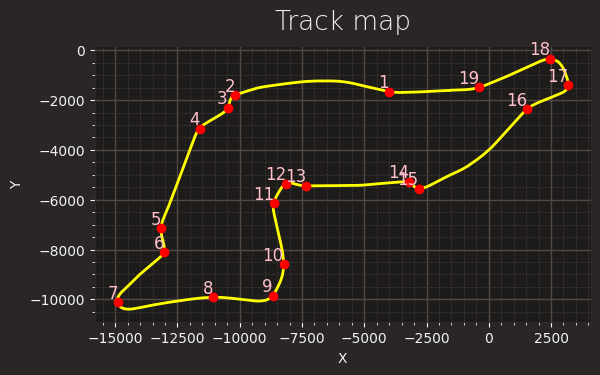

In [9]:
fig, axes = plt.subplots()

axes.plot(telemetry_driver['X'], telemetry_driver['Y'], color='yellow', linewidth = 2)

axes.plot(track_corners['X'], track_corners['Y'], 'ro')

for i, (x, y, corner_number) in track_corners[['X', 'Y', 'Number']].iterrows():
    axes.text(x, y, str(int(corner_number)), color='pink', fontsize=12, ha='right', va='bottom')


axes.set(xlabel = "X", ylabel = "Y", title="Track map")

axes.set_aspect('equal', adjustable='box')

<b>Speed</b>

In [10]:
v = telemetry_driver['Speed'] / 3.6     # km/h > m/s
time_float = telemetry_driver['Time'] / np.timedelta64(1, 's')  # dd > seconds

[Text(0.5, 0, 'Distance (m)'), Text(0, 0.5, 'Speed (km/h)')]

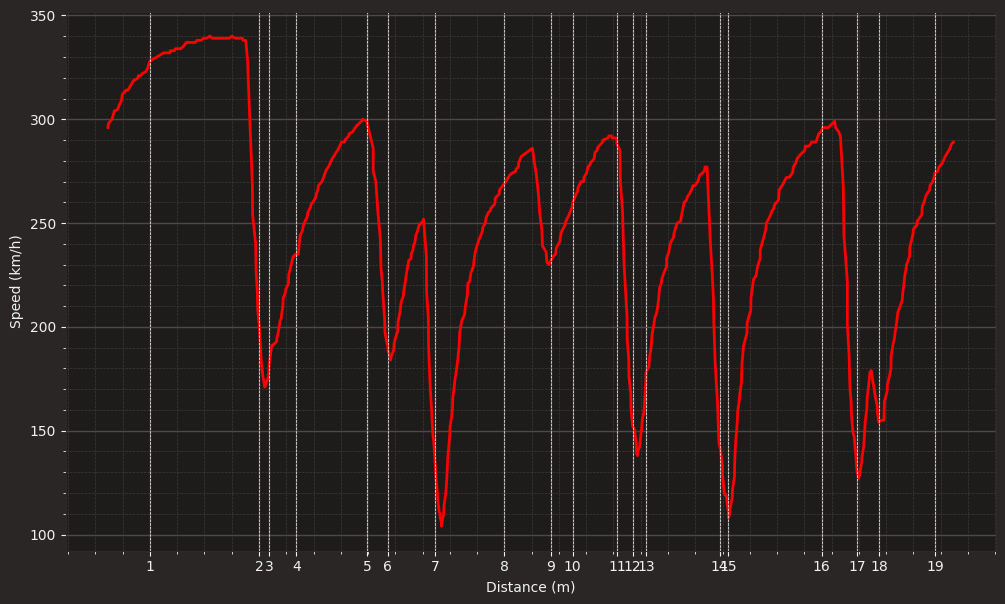

In [11]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(telemetry_driver['Distance'], telemetry_driver['Speed'], color='r', linewidth = 2)

for distance, number in zip(track_corners['Distance'], track_corners['Number']):
    axes.axvline(x=distance, linestyle='--', color='w', linewidth = 0.5)

axes.set_xticks(track_corners['Distance'])
axes.set_xticklabels(track_corners['Number'])

axes.set(xlabel = "Distance (m)", ylabel = "Speed (km/h)")
# axes.set_aspect('equal', adjustable='box')


<b>List of drivers fastest times</b>

In [12]:
drivers_list = session.drivers

drivers_fastest_laps = []
for driver_number in drivers_list:
    fastest_lap = session.laps.pick_driver(driver_number).pick_fastest()
    if not fastest_lap.isnull().all():
        drivers_fastest_laps.append(fastest_lap)


c:\Users\Luca\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:3112: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "


<b>Drivers fastest lap times [BAR]</b>

(72.746, 77.417)

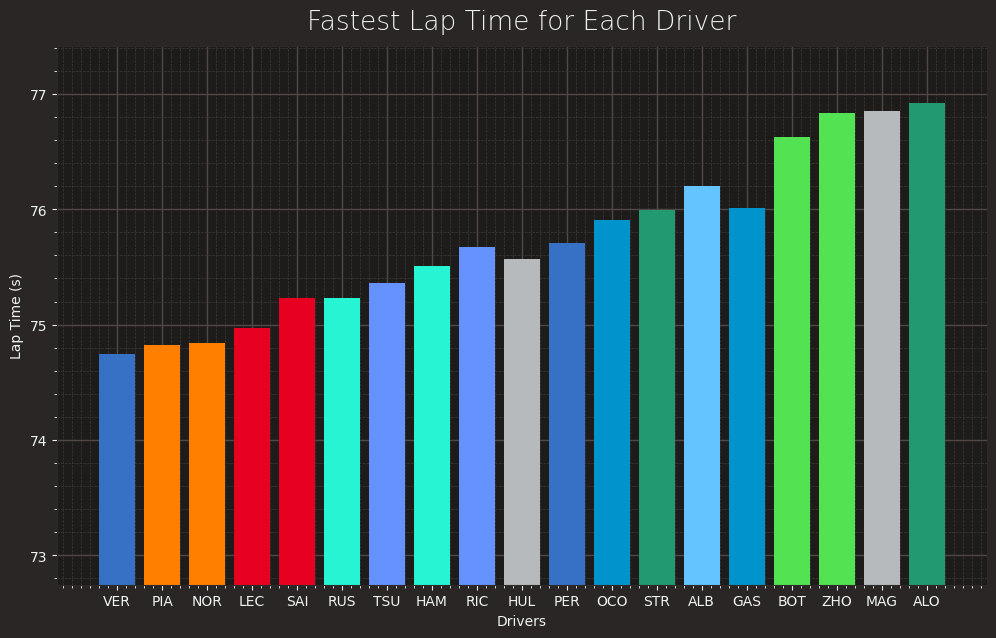

In [13]:
drivers = []
lap_times = []

for d in drivers_fastest_laps:
    lap_time_seconds = (d.LapTime / np.timedelta64(1, 's'))
    drivers.append(d.Driver)
    lap_times.append(lap_time_seconds)

bar_colors = ['#' + results.loc[results['Abbreviation'] == driver, 'TeamColor'].iloc[0] for driver in drivers]

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(drivers, lap_times, color=bar_colors)

ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time (s)')
ax.set_title('Fastest Lap Time for Each Driver')

min_y = min(lap_times) - 2  # 2 seconds below the minimum lap time
max_y = max(lap_times) + 0.5 # 2 seconds above the maximum lap time
ax.set_ylim([min_y, max_y])

<b>List of teams fastest times</b>

In [14]:
teams_list = session.laps['Team'].unique()

teams_fastest_laps = []
for team_name in teams_list:
    fastest_lap = session.laps.pick_team(team_name).pick_fastest()
    if not fastest_lap.isnull().all():
        teams_fastest_laps.append(fastest_lap)


(72.746, 77.126)

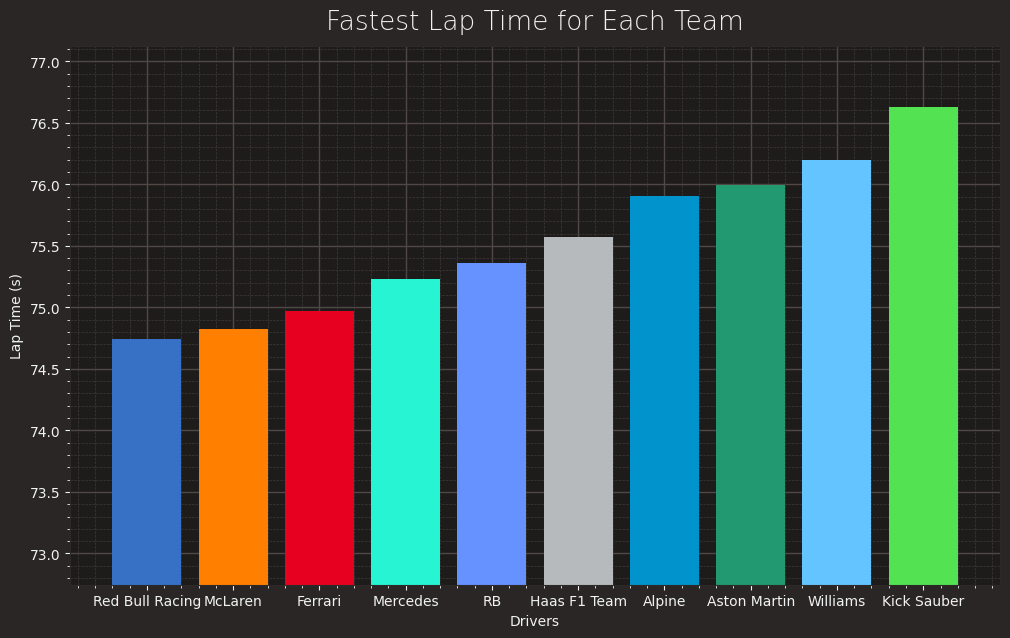

In [15]:
teams = []
lap_times = []

for t in teams_fastest_laps:
    lap_time_seconds = (t.LapTime / np.timedelta64(1, 's'))
    teams.append(t.Team)
    lap_times.append(lap_time_seconds)

bar_colors = ['#' + results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0] for team in teams]
#bar_colors = [team_colors.get(team, 'gray') for team in teams]

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(teams, lap_times, color=bar_colors)

ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time (s)')
ax.set_title('Fastest Lap Time for Each Team')

min_y = min(lap_times) - 2  # 2 seconds below the minimum lap time
max_y = max(lap_times) + 0.5 # 2 seconds above the maximum lap time
ax.set_ylim([min_y, max_y])

In [16]:
def printCross(ax, average_vs, max_vs):
    # Calculate the intersection point of the diagonalsmin_avg_v = min(average_vs)
    min_avg_v = min(average_vs)
    max_avg_v = max(average_vs)
    min_max_v = min(max_vs)
    max_max_v = max(max_vs)

    intersection_avg_v = (min_avg_v + max_avg_v) / 2
    intersection_max_v = (min_max_v + max_max_v) / 2

    # Adding vertical and horizontal lines at the intersection point
    ax.axhline(y=intersection_max_v, color='gray', linestyle='-')
    ax.axvline(x=intersection_avg_v, color='gray', linestyle='-')

    ax.text(max_avg_v, intersection_max_v, "Quick", color='w', fontsize=12, ha='center', va='center')
    ax.text(min_avg_v, intersection_max_v, "Slow", color='w', fontsize=12, ha='center', va='center')

    ax.text(intersection_avg_v, max_max_v, "Low Drag", color='w', fontsize=12, ha='center', va='center')
    ax.text(intersection_avg_v, min_max_v, "High Drag", color='w', fontsize=12, ha='center', va='center')

    # Adding two diagonals
    ax.plot([min_avg_v, max_avg_v], [min_max_v, max_max_v], color='gray', linestyle='-')
    ax.plot([min_avg_v, max_avg_v], [max_max_v, min_max_v], color='gray', linestyle='-')

    ax.text(max_avg_v, max_max_v, "Correlated with \nHigh Efficiency", color='w', fontsize=12, ha='right', va='top')
    ax.text(min_avg_v, min_max_v, "Correlated with \nLow Efficiency", color='w', fontsize=12, ha='left', va='bottom')

    ax.text(max_avg_v, min_max_v, "Correlated with \nHigh Downforce", color='w', fontsize=12, ha='right', va='bottom')
    ax.text(min_avg_v, max_max_v, "Correlated with \nLow Downforce", color='w', fontsize=12, ha='left', va='top')
    
    return()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

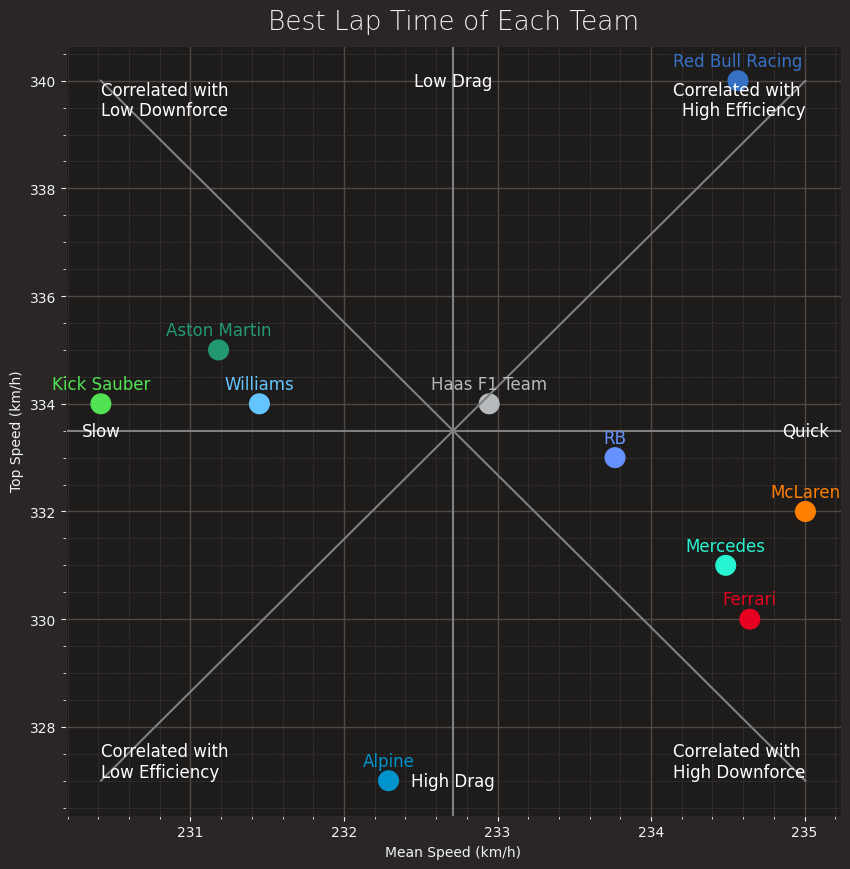

In [17]:
teams = []
average_vs = []
max_vs = []

for t in teams_fastest_laps:
    telemetry_team = t.get_telemetry()
    v = telemetry_team['Speed']
    average_v = sum(v) / len(v)
    
    max_v = max(v)
    teams.append(t.Team)
    average_vs.append(average_v)
    max_vs.append(max_v)

bar_col = [results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0] for team in teams]
bar_colors = ['#' + results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0] for team in teams]

fig, ax = plt.subplots(figsize=(10, 10))

printCross(ax, average_vs, max_vs)

# Print values
ax.scatter(average_vs, max_vs, color=bar_colors, s=200)

for i in range(len(average_vs)):
    ax.text(average_vs[i], 
              max_vs[i]+0.2, 
              results.loc[results['TeamColor'] == bar_col[i], 'TeamName'].iloc[0], 
              color=bar_colors[i], 
              fontsize=12, ha='center', va='bottom')


ax.set_xlabel('Mean Speed (km/h)')
ax.set_ylabel('Top Speed (km/h)')
ax.set_title('Best Lap Time of Each Team')

# min_x = min(average_vs) - 0.2  # 2 seconds below the minimum lap time
# max_x = max(average_vs) + 0.2 # 2 seconds above the maximum lap time
# ax.set_xlim([min_x, min_x])

axes.set_aspect('equal', adjustable='box')


<b>Longitudinal and Lateral acceleration</b>

In [18]:
def convert_to_g(accelerations_ms2):
    g = 9.81
    return accelerations_ms2 / g


In [19]:
# long - lat acceleration
import math
#
# Define a set of helper functions to perform the computations
#
def smooth_derivative(t_in,v_in):

    #
    # Function to compute a smooth estimation of a derivative.
    # [REF: http://holoborodko.com/pavel/numerical-methods/numerical-derivative/smooth-low-noise-differentiators/]
    #
    
    # Configuration
    #
    # Derivative method: two options: 'smooth' or 'centered'. Smooth is more conservative
    # but helps to supress the very noisy signals. 'centered' is more agressive but more noisy
    method = "smooth"   
    #method = "centered"   

    
    t = t_in.copy()
    v = v_in.copy()
    
    # (0) Prepare inputs
    
    # (0.1) Time needs to be transformed to seconds
    try:
        for i in range(0,t.size):
            t.iloc[i] = t.iloc[i].total_seconds()
    except:
        pass
    
    t = np.array(t);
    v = np.array(v);
    
    # (0.1) Assert they have the same size
    assert t.size == v.size;
    
    # (0.2) Initialize output
    dvdt = np.zeros(t.size);
    
    # (1) Manually compute points out of the stencil
    
    # (1.1) First point
    dvdt[0] = (v[1]-v[0])/(t[1]-t[0]);
    
    # (1.2) Second point
    dvdt[1] = (v[2]-v[0])/(t[2]-t[0])
    
    # (1.3) Third point
    dvdt[2] = (v[3]-v[1])/(t[3]-t[1])
    
    # (1.4) Last points
    n = t.size
    dvdt[n-1] = (v[n-1]-v[n-2])/(t[n-1]-t[n-2])
    dvdt[n-2] = (v[n-1]-v[n-3])/(t[n-1]-t[n-3])
    dvdt[n-3] = (v[n-2]-v[n-4])/(t[n-2]-t[n-4])

    # (2) Compute the rest of the points
    if (method=='smooth'):
        c = [5./32., 4./32., 1./32.]
        for i in range(3,t.size-3):
            for j in range(1,4):
                dvdt[i] += 2*j*c[j-1]*(v[i+j]-v[i-j])/(t[i+j]-t[i-j])
    elif (method == 'centered'):
        for i in range(3,t.size-2):
            for j in range(1,4):
                dvdt[i] = (v[i+1]-v[i-1])/(t[i+1]-t[i-1])
                
    return dvdt;

def truncated_remainder(dividend, divisor):
    divided_number = dividend / divisor
    divided_number = \
        -int(-divided_number) if divided_number < 0 else int(divided_number)

    remainder = dividend - divisor * divided_number

    return remainder

def transform_to_pipi(input_angle):
    pi = math.pi
    revolutions = int((input_angle + np.sign(input_angle) * pi) / (2 * pi))

    p1 = truncated_remainder(input_angle + np.sign(input_angle) * pi, 2 * pi)
    p2 = (np.sign(np.sign(input_angle)
                  + 2 * (np.sign(math.fabs((truncated_remainder(input_angle + pi, 2 * pi))
                                      / (2 * pi))) - 1))) * pi

    output_angle = p1 - p2

    return output_angle, revolutions

def remove_acceleration_outliers(acc):
    
    #acc_threshold_g = 10.0;
    acc_threshold_g = 7.0
    if (math.fabs(acc[0]) > acc_threshold_g):
        acc[0] = 0.0
        
    for i in range(1,acc.size-1):
        if ( math.fabs(acc[i]) > acc_threshold_g ):
            acc[i] = acc[i-1]
            
    if (math.fabs(acc[-1]) > acc_threshold_g ):
        acc[-1] = acc[-2]            

    return acc;

def compute_accelerations(telemetry):

    v = np.array(telemetry['Speed'])/3.6;
    lon_acc = smooth_derivative(telemetry['Time'],v)/9.81

    dx = smooth_derivative(telemetry['Distance'],telemetry['X'])
    dy = smooth_derivative(telemetry['Distance'],telemetry['Y'])

    theta = np.zeros(dx.size)
    theta[0] = math.atan2(dy[0],dx[0])
    for i in range(0,dx.size):
        theta[i] = theta[i-1] + transform_to_pipi(math.atan2(dy[i],dx[i])-theta[i-1])[0]
        
    kappa = smooth_derivative(telemetry['Distance'], theta)
    lat_acc = v*v*kappa/9.81;
    
    # Remove outliers
    lon_acc = remove_acceleration_outliers(lon_acc)
    lat_acc = remove_acceleration_outliers(lat_acc)
    
    return lon_acc, lat_acc;

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


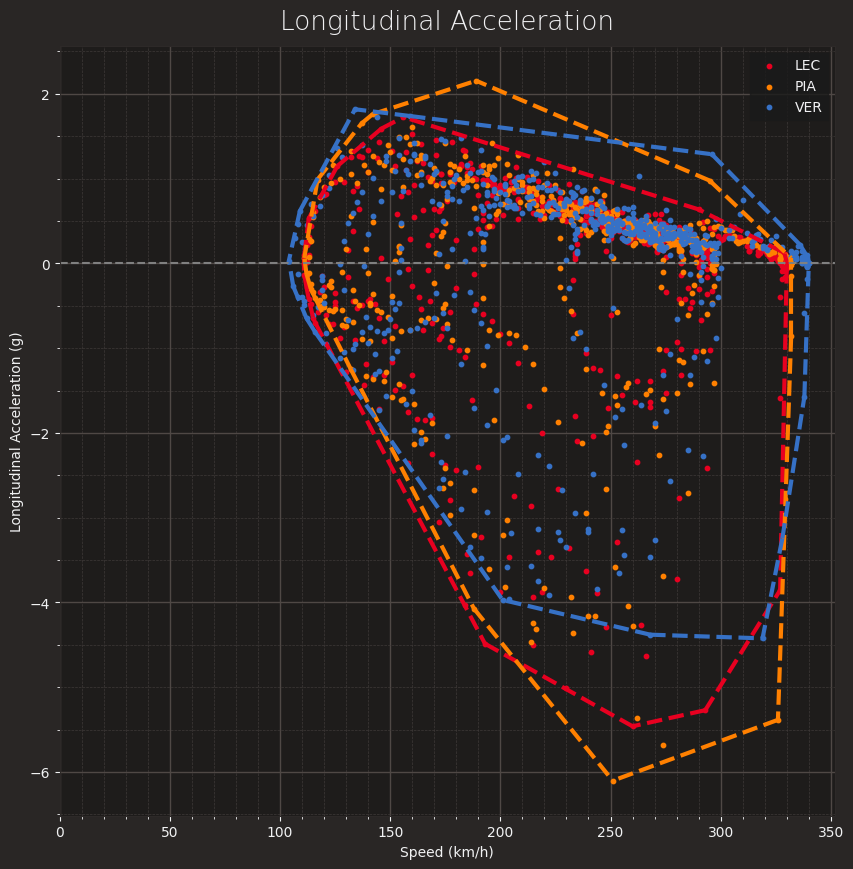

In [20]:
# Longitudinal acceleration
from scipy.spatial import ConvexHull

fig, ax = plt.subplots(figsize=(10, 10))

for index in indices:
    d = drivers_fastest_laps[index]
    # Telemetry of the driver
    telemetry_d = d.get_telemetry()
    lon_acc, lat_acc = compute_accelerations(telemetry_d)

    driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]
    
    # Print values
    ax.scatter(telemetry_d['Speed'], 
               lon_acc, 
               color=driver_color, 
               s=10,
               label=d.Driver)

    points = np.column_stack((telemetry_d['Speed'], lon_acc))

    # Compute the convex hull
    hull = ConvexHull(points)

    # Plot the convex hull
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color=driver_color, linestyle='--', linewidth = 3)

    
ax.axhline(y=0, color='grey', linestyle='--')

ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Longitudinal Acceleration (g)')
ax.set_title('Longitudinal Acceleration')
ax.set_xlim(0, None)

ax.legend()

plt.show()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


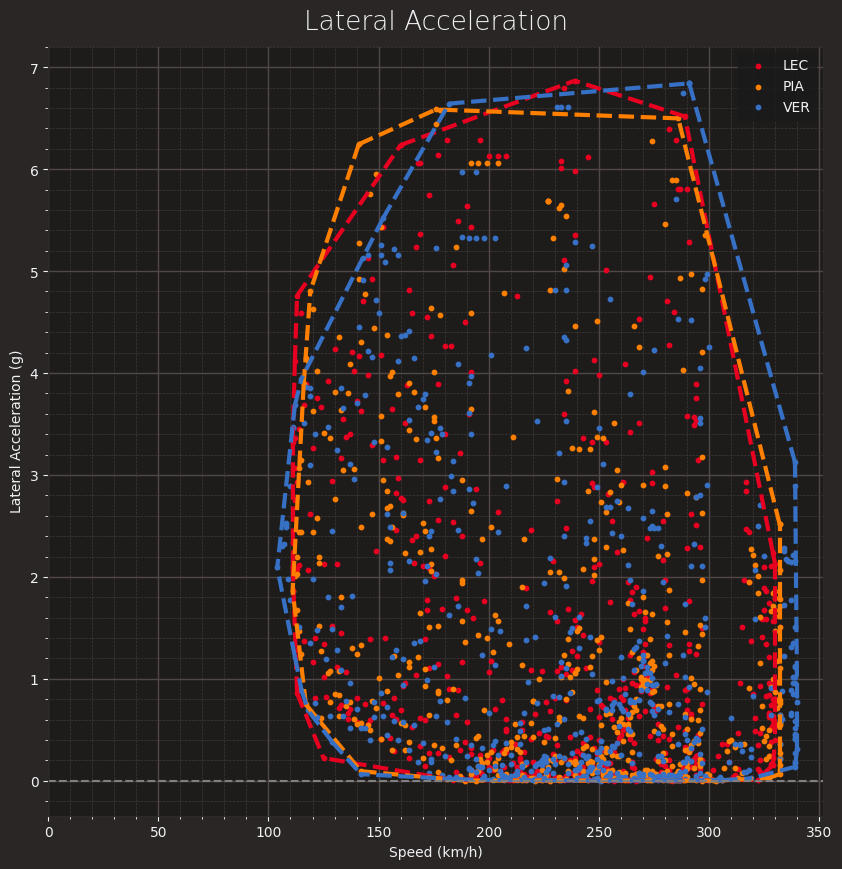

In [21]:
# Lateral acceleration
from scipy.spatial import ConvexHull

fig, ax = plt.subplots(figsize=(10, 10))

for index in indices:
    d = drivers_fastest_laps[index]
    # Telemetry of the driver
    telemetry_d = d.get_telemetry()
    lon_acc, lat_acc = compute_accelerations(telemetry_d)

    driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]
    
    lat_acc = abs(lat_acc)
    # Print values
    ax.scatter(telemetry_d['Speed'], 
               lat_acc, 
               color=driver_color, 
               s=10,
               label=d.Driver)

    points = np.column_stack((telemetry_d['Speed'], lat_acc))

    # Compute the convex hull
    hull = ConvexHull(points)

    # Plot the convex hull
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color=driver_color, linestyle='--', linewidth = 3)

    
ax.axhline(y=0, color='grey', linestyle='--')

ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Lateral Acceleration (g)')
ax.set_title('Lateral Acceleration')
ax.set_xlim(0, None)

ax.legend()

plt.show()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


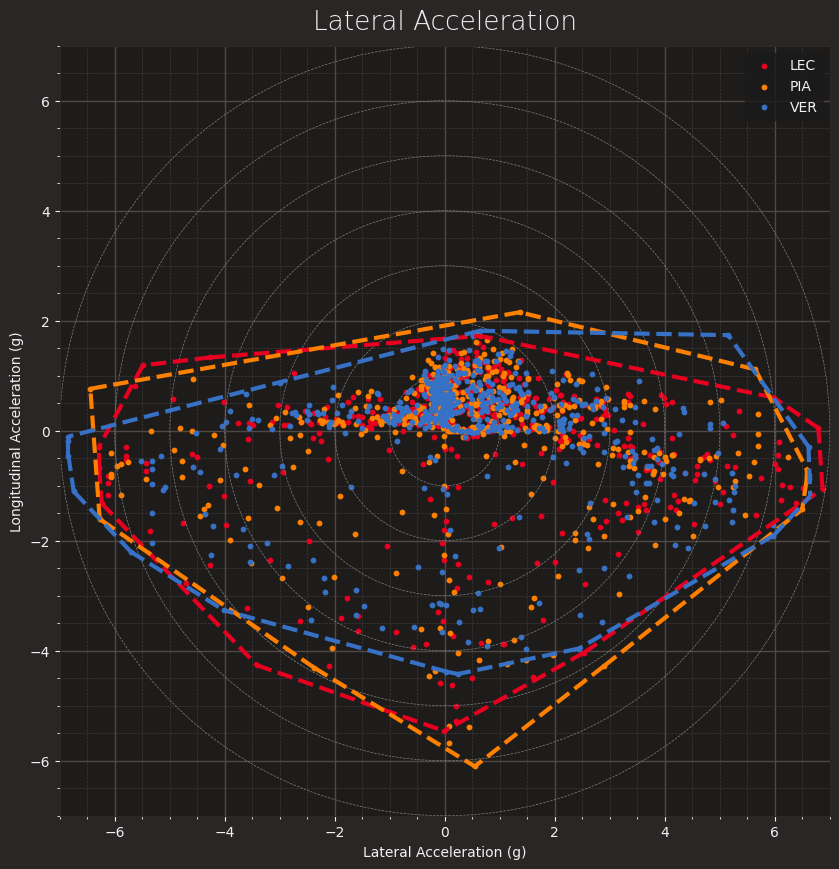

In [22]:
# Lateral and Longitudinal acceleration
from scipy.spatial import ConvexHull

fig, ax = plt.subplots(figsize=(10, 10))

for index in indices:
    d = drivers_fastest_laps[index]
    # Telemetry of the driver
    telemetry_d = d.get_telemetry()
    lon_acc, lat_acc = compute_accelerations(telemetry_d)

    driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]
    
    # Print values
    ax.scatter(lat_acc, 
               lon_acc, 
               color=driver_color, 
               s=10,
               label=d.Driver)

    points = np.column_stack((lat_acc, lon_acc))

    # Compute the convex hull
    hull = ConvexHull(points)

    # Plot the convex hull
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color=driver_color, linestyle='--', linewidth = 3)

# Add concentric circles
max_range = max(max(lat_acc), max(lon_acc), abs(min(lat_acc)), abs(min(lon_acc)))
max_range = math.ceil(max_range)
for radius in range(1, max_range+1):  # Adjust the range as needed
    circle = plt.Circle((0, 0), radius, color='grey', fill=False, linestyle='--', linewidth=0.5)
    ax.add_artist(circle)
    
ax.set_xlabel('Lateral Acceleration (g)')
ax.set_ylabel('Longitudinal Acceleration (g)')
ax.set_title('Lateral Acceleration')
ax.legend()

ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)
ax.set_aspect('equal')

plt.show()

In [23]:
lon_acc, lat_acc = compute_accelerations(telemetry_driver)

C:\Users\Luca\AppData\Local\Temp\ipykernel_4180\2749234647.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


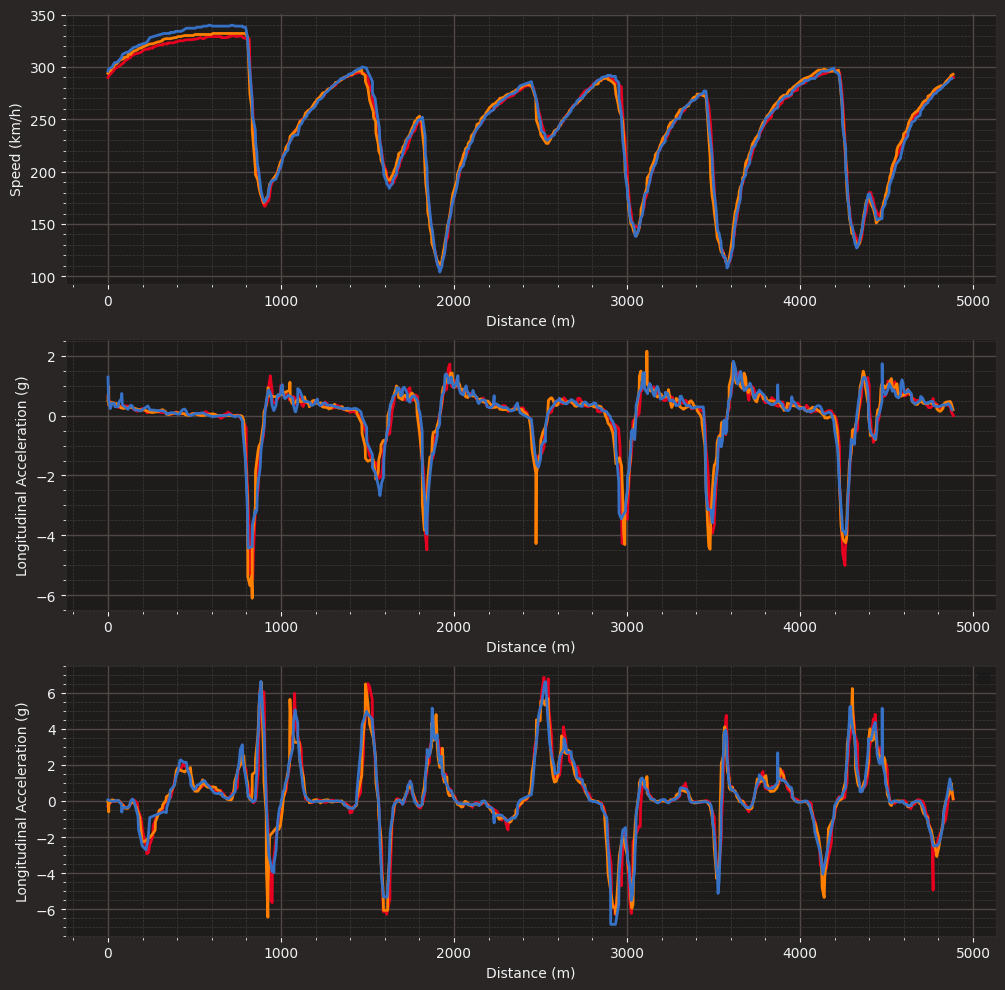

In [93]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for i in indices:
    driver = drivers_fastest_laps[i]
    telemetry_d = driver.telemetry
    lon_acc, lat_acc = compute_accelerations(telemetry_d)
    driver_color = '#' + results.loc[results['Abbreviation'] == driver.Driver, 'TeamColor'].iloc[0]

    axes[0].plot(telemetry_d['Distance'], telemetry_d['Speed'], color=driver_color,linewidth = 2)
    axes[0].set(xlabel = "Distance (m)", ylabel = "Speed (km/h)")

    axes[1].plot(telemetry_d['Distance'], lon_acc, color=driver_color, linewidth = 2)
    axes[1].set(xlabel = "Distance (m)", ylabel = "Longitudinal Acceleration (g)")

    axes[2].plot(telemetry_d['Distance'], lat_acc, color=driver_color, linewidth = 2)
    axes[2].set(xlabel = "Distance (m)", ylabel = "Longitudinal Acceleration (g)")

    axes[2].legend()

<b>Gaps</b>

Text(0.5, 0, 'Gap (s)')

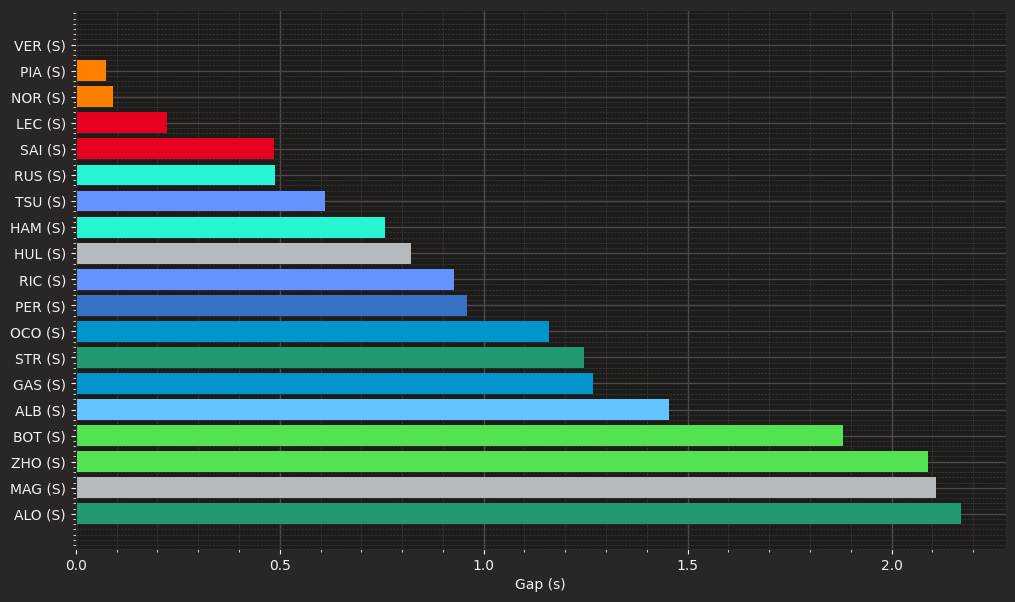

In [25]:
def calculate_gap(fastest_lap, lap):
    return (lap - fastest_lap)

drivers = []
drivers_compound = []
gap_times = []

# Collect data into a list of tuples: (lap_time_seconds, driver, compound)
data = []
for d in drivers_fastest_laps:
    lap_time_seconds = (d.LapTime / np.timedelta64(1, 's'))
    data.append((lap_time_seconds, d.Driver, d.Compound[0]))

data.sort(key=lambda x: x[0])

fastest_lap_s = data[0][0]
gap_times = [calculate_gap(fastest_lap_s, lap_time_seconds) for lap_time_seconds, _, _ in data]
drivers = [driver for _, driver, _ in data]
drivers_compound = [f"{driver} ({compound})" for _, driver, compound in data]

bar_colors = ['#' + results.loc[results['Abbreviation'] == driver, 'TeamColor'].iloc[0] for driver in drivers]

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(drivers_compound[::-1], gap_times[::-1], color=bar_colors[::-1])

ax.set_xlabel('Gap (s)')


Text(0.5, 1.0, 'Gap (s) to Overall Ideal Lap [74.492s]')

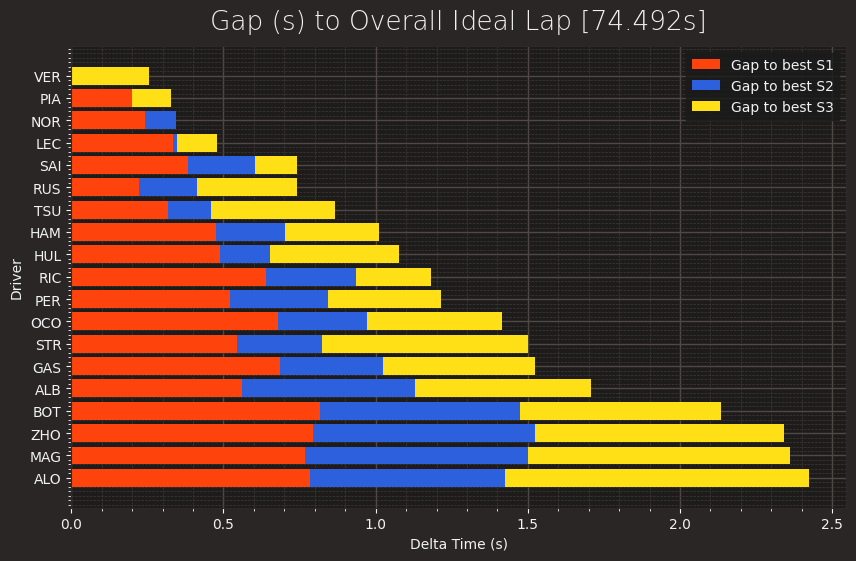

In [54]:
def calculate_best_sectors(data):
    dd = data[0][0]
    best_s1 = (dd.Sector1Time / np.timedelta64(1, 's'))
    best_s2 = (dd.Sector2Time / np.timedelta64(1, 's')) 
    best_s3 = (dd.Sector3Time / np.timedelta64(1, 's'))

    for d in data[1:]:
        driver = d[0]
        d_s1 = (driver.Sector1Time / np.timedelta64(1, 's'))
        d_s2 = (driver.Sector2Time / np.timedelta64(1, 's')) 
        d_s3 = (driver.Sector3Time / np.timedelta64(1, 's'))
        
        if d_s1 < best_s1:
            best_s1 = d_s1

        if d_s2 < best_s2:
            best_s2 = d_s2

        if d_s3 < best_s3:
            best_s3 = d_s3
    
    return best_s1, best_s2, best_s3

drivers = []
drivers_compound = []
gap_times = []

# Collect data into a list of tuples: (driver_fastest_lap, lap_time_seconds)
data = []
for dfl in drivers_fastest_laps:
    lap_time_seconds = (dfl.LapTime / np.timedelta64(1, 's'))
    data.append((dfl, lap_time_seconds))

data.sort(key=lambda x: x[1])

best_s1, best_s2, best_s3 = calculate_best_sectors(data)
overall_ideal_lap = best_s1 + best_s2 + best_s3

gaps_data = []
for d in data:
    driver = d[0]
    d_s1 = (driver.Sector1Time / np.timedelta64(1, 's'))
    d_s2 = (driver.Sector2Time / np.timedelta64(1, 's')) 
    d_s3 = (driver.Sector3Time / np.timedelta64(1, 's'))

    delta_s1 = d_s1 - best_s1
    delta_s2 = d_s2 - best_s2
    delta_s3 = d_s3 - best_s3

    gaps_data.append((d[1], delta_s1, delta_s2, delta_s3, driver.Driver))


# Extracting driver names and delta values
drivers = [item[4] for item in gaps_data]
delta_s1 = [item[1] for item in gaps_data]
delta_s2 = [item[2] for item in gaps_data]
delta_s3 = [item[3] for item in gaps_data]

# Bar positions
positions = np.arange(len(drivers))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for delta_s1
ax.barh(positions, delta_s1, color='#ff430c', label='Gap to best S1')
# Plotting bars for delta_s2
ax.barh(positions, delta_s2, color='#2d60dd', left=delta_s1, label='Gap to best S2')
# Plotting bars for delta_s3
ax.barh(positions, delta_s3, color='#ffe017', left=np.add(delta_s1, delta_s2), label='Gap to best S3')

# Setting y-ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(drivers)
ax.invert_yaxis()  # Invert y-axis to have the first driver on top

# Adding legend and labels
ax.legend()
ax.set_xlabel('Delta Time (s)')
ax.set_ylabel('Driver')

plt.title(f"Gap (s) to Overall Ideal Lap [{overall_ideal_lap}s]")

In [27]:
# Pick all non deleted laps of all the drivers
drivers_list = session.drivers

drivers_laps = []
for driver_number in drivers_list:
    driver_laps = session.laps.pick_driver(driver_number).pick_accurate().pick_not_deleted()
    if not driver_laps.empty:
        drivers_laps.append(driver_laps)


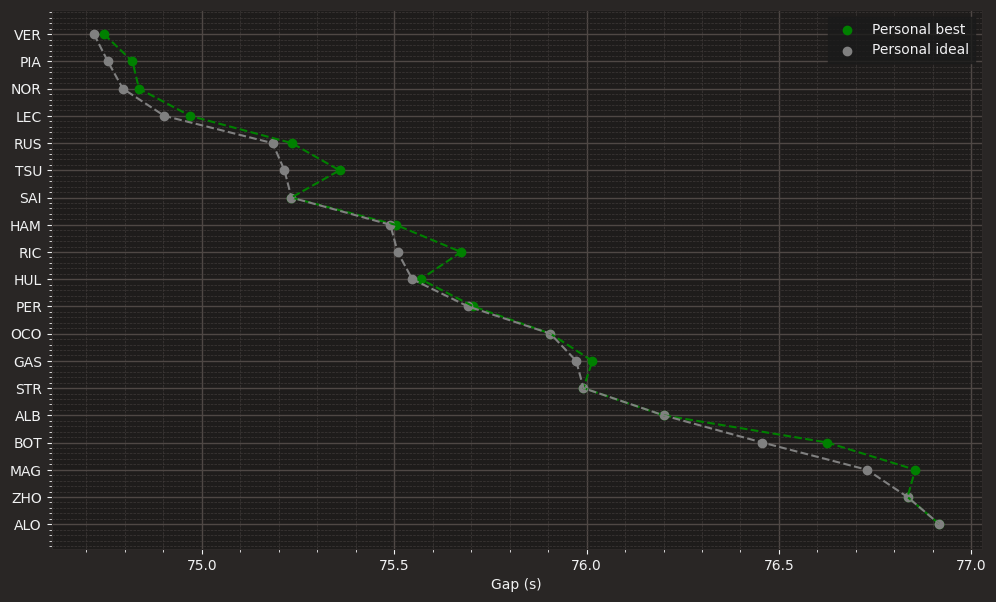

In [28]:
def best_ideal_lap(driver_laps):
    lap = driver_laps.iloc[0]
    best_s1 = (lap.Sector1Time / np.timedelta64(1, 's'))
    best_s2 = (lap.Sector2Time / np.timedelta64(1, 's')) 
    best_s3 = (lap.Sector3Time / np.timedelta64(1, 's'))

    for lap in driver_laps.itertuples():
        d_s1 = (lap.Sector1Time / np.timedelta64(1, 's'))
        d_s2 = (lap.Sector2Time / np.timedelta64(1, 's')) 
        d_s3 = (lap.Sector3Time / np.timedelta64(1, 's'))
        
        if d_s1 < best_s1:
            best_s1 = d_s1

        if d_s2 < best_s2:
            best_s2 = d_s2

        if d_s3 < best_s3:
            best_s3 = d_s3
    
    return best_s1 + best_s2 + best_s3

data = []
for d_laps in drivers_laps:
    fastest_lap = (d_laps.pick_fastest().LapTime  / np.timedelta64(1, 's'))
    ideal_lap = best_ideal_lap(d_laps)
    driver_name = d_laps.iloc[0].Driver

    data.append((fastest_lap, ideal_lap, driver_name))

data.sort(key=lambda x: x[1])

fastest_laps = [item[0] for item in data]
ideal_laps = [item[1] for item in data]
drivers = [item[2] for item in data]

# Convert driver names to numerical indices for the y-axis
y_indices = range(len(drivers))

fig, ax = plt.subplots(figsize=(12, 7))

# Fastest laps
ax.scatter(fastest_laps, y_indices, color='green', label='Personal best')
ax.plot(fastest_laps, y_indices, color='green', linestyle='--', linewidth=1.5)

# Ideal laps
ax.scatter(ideal_laps, y_indices, color='grey', label='Personal ideal')
ax.plot(ideal_laps, y_indices, color='grey', linestyle='--', linewidth=1.5)

# Set driver names as y-tick labels
ax.set_yticks(y_indices)
ax.set_yticklabels(drivers)

ax.invert_yaxis()


ax.set_xlabel('Gap (s)')

ax.legend()

# print(best_ideal_lap(drivers_laps[0]))
# print(drivers_laps[0].pick_fastest().LapTime / np.timedelta64(1, 's'))

<b>Throttle - Brake - Gear</b>

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


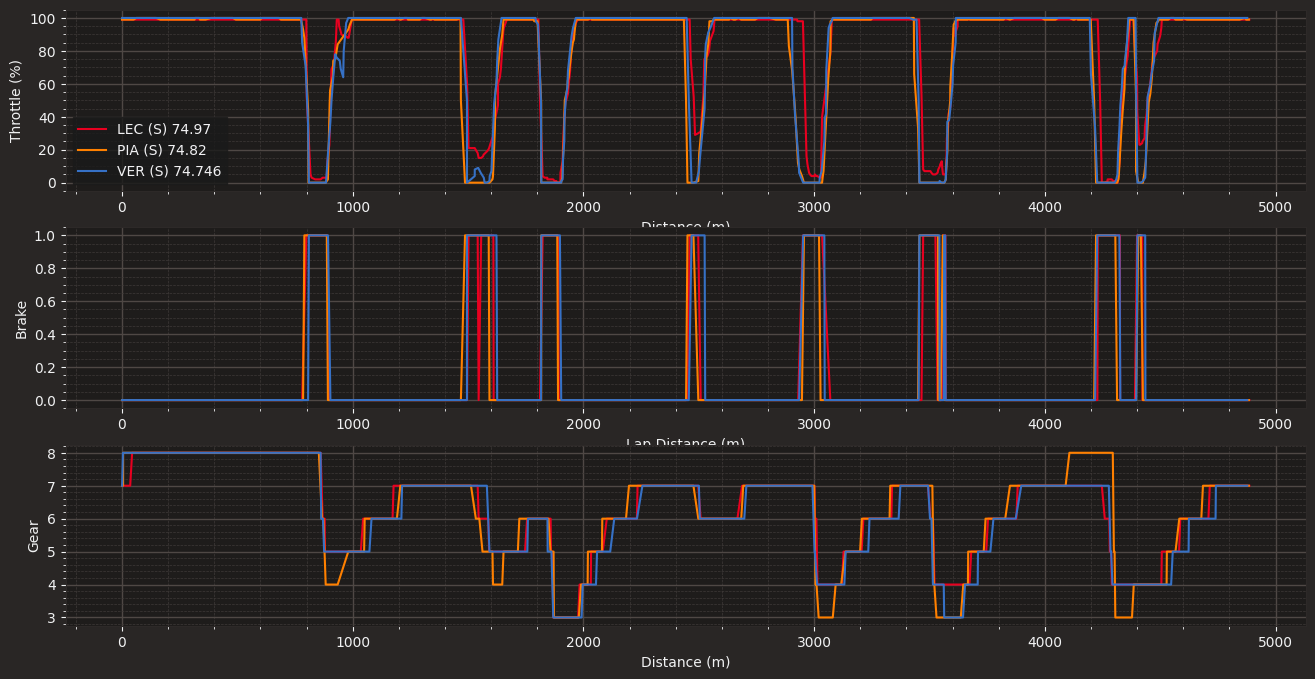

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(16, 8))

for i in indices:
    d = drivers_fastest_laps[i]
    telemetry_d = d.get_telemetry()
    lap_m = (d.LapTime  / np.timedelta64(1, 's'))

    driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]

    label = f"{d.Driver} ({d.Compound[0]}) {lap_m}"

    ax[0].plot(telemetry_d['Distance'], telemetry_d['Throttle'], linewidth = 1.5, color=driver_color, label=label)
    ax[0].set(xlabel = "Distance (m)", ylabel = "Throttle (%)")

    ax[1].plot(telemetry_d['Distance'], telemetry_d['Brake'], linewidth = 1.5, color=driver_color)
    ax[1].set(xlabel = "Lap Distance (m)", ylabel = "Brake")

    ax[2].plot(telemetry_d['Distance'], telemetry_d['nGear'], linewidth = 1.5, color=driver_color)
    ax[2].set(xlabel = "Distance (m)", ylabel = "Gear")

    ax[0].legend()


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

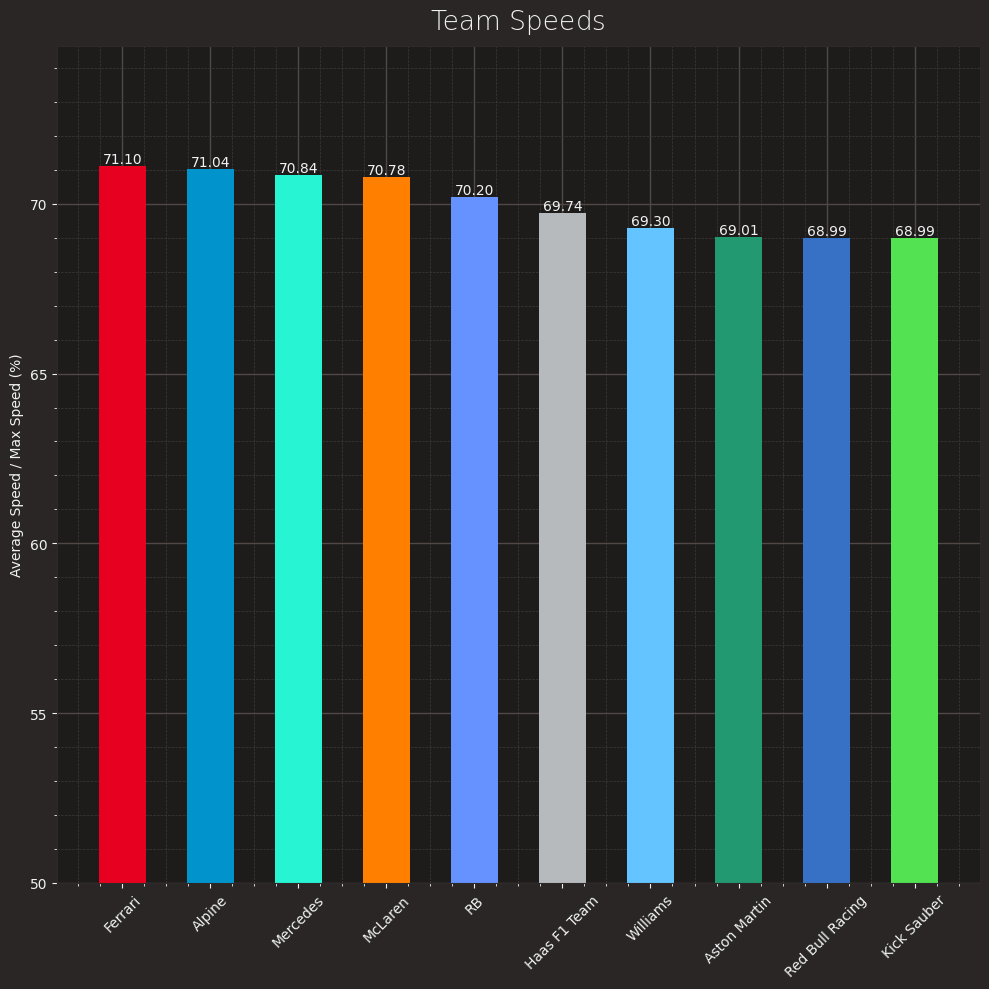

In [30]:
data = []
for t in teams_fastest_laps:
    team = t.Team
    
    telemetry_team = t.get_telemetry()
    v = telemetry_team['Speed']
    average_v = sum(v) / len(v)
    max_v = max(v)
    v_avg_max = average_v / max_v *100

    team_color = '#' + results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0]

    data.append([team, v_avg_max, team_color])

data.sort(key=lambda x: x[1], reverse=True)

teams = [item[0] for item in data]
vs_avg_max = [item[1] for item in data]
team_colors = [item[2] for item in data]

fig, ax = plt.subplots(figsize=(10,10))

# Calculate positions with extra space
positions = np.arange(len(teams)) * 1.5

# Plotting the bar chart with custom width and positions
bars = ax.bar(positions, vs_avg_max, color=team_colors, width=0.8)

# Set x-ticks to match the bar positions
ax.set_xticks(positions)
ax.set_xticklabels(teams, rotation=45)

# Add value annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:.2f}', 
        ha='center', 
        va='bottom'
    )

ax.set_ylim(50, None)
ax.set_ylabel('Average Speed / Max Speed (%)')
ax.set_title('Team Speeds')

plt.tight_layout()
plt.show()

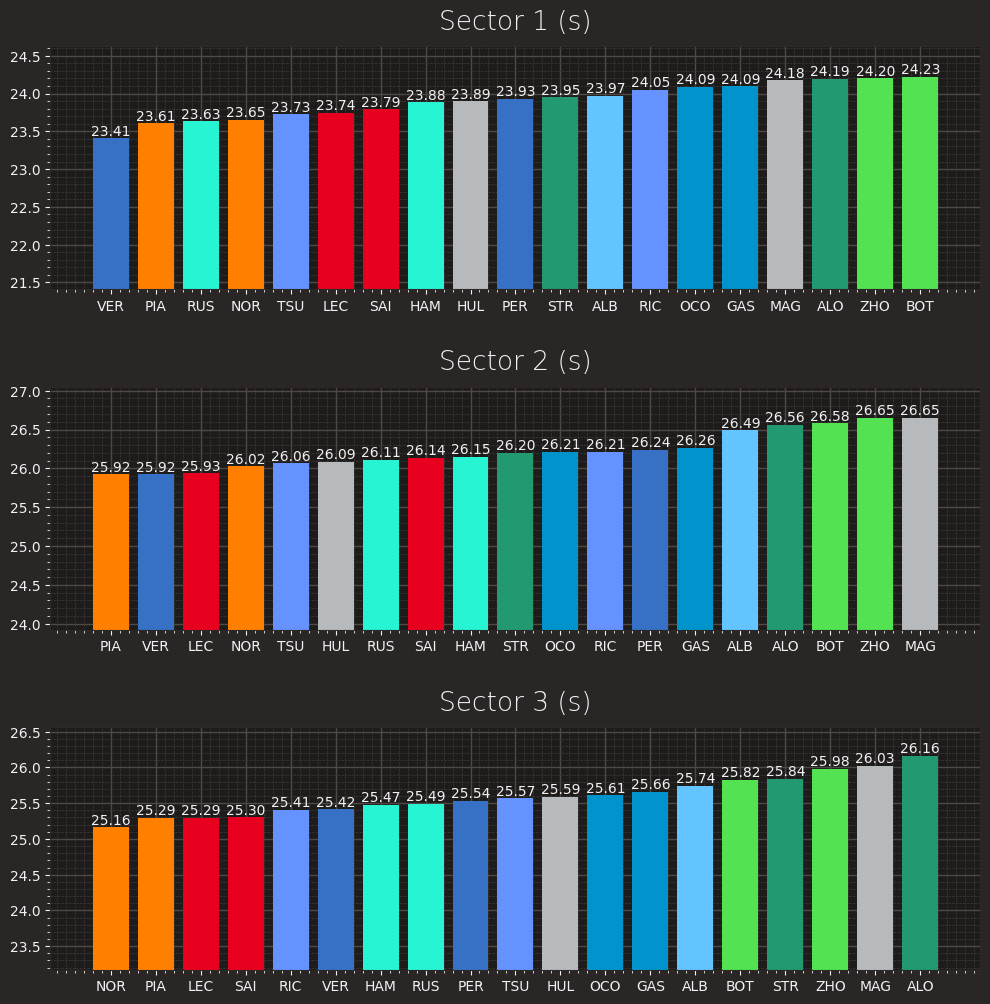

In [90]:
data_s1 = []
data_s2 = []
data_s3 = []
for d in drivers_fastest_laps:
    driver_name = d.Driver
    driver_color = '#' + results.loc[results['Abbreviation'] == driver_name, 'TeamColor'].iloc[0]
    best_s1 = (d.Sector1Time / np.timedelta64(1, 's'))
    best_s2 = (d.Sector2Time / np.timedelta64(1, 's'))
    best_s3 = (d.Sector3Time / np.timedelta64(1, 's'))

    data_s1.append([driver_name, driver_color, best_s1])
    data_s2.append([driver_name, driver_color, best_s2])
    data_s3.append([driver_name, driver_color, best_s3])


data_s1.sort(key=lambda x: x[2])
data_s2.sort(key=lambda x: x[2])
data_s3.sort(key=lambda x: x[2])


fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Sector 1
drivers = [item[0] for item in data_s1]
colors = [item[1] for item in data_s1]
times_s1 = [item[2] for item in data_s1]
positions = np.arange(len(drivers))

bars = ax[0].bar(positions, times_s1, color=colors, width=0.8)
ax[0].set_xticks(positions)
ax[0].set_xticklabels(drivers)
ax[0].set_ylim((min(times_s1) - 2), (max(times_s1) + 0.4))
ax[0].set(title="Sector 1 (s)")

for bar in bars:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:.2f}', 
        ha='center', 
        va='bottom'
    )

# Sector 2
drivers = [item[0] for item in data_s2]
colors = [item[1] for item in data_s2]
times_s2 = [item[2] for item in data_s2]
positions = np.arange(len(drivers))

bars = ax[1].bar(positions, times_s2, color=colors, width=0.8)
ax[1].set_xticks(positions)
ax[1].set_xticklabels(drivers)
ax[1].set_ylim(min(times_s2) - 2, (max(times_s2) + 0.4))
ax[1].set(title="Sector 2 (s)")

for bar in bars:
    height = bar.get_height()
    ax[1].text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:.2f}', 
        ha='center', 
        va='bottom'
    )

# Sector 3
drivers = [item[0] for item in data_s3]
colors = [item[1] for item in data_s3]
times_s3 = [item[2] for item in data_s3]
positions = np.arange(len(drivers))

bars = ax[2].bar(positions, times_s3, color=colors, width=0.8)
ax[2].set_xticks(positions)
ax[2].set_xticklabels(drivers)
ax[2].set_ylim((min(times_s3) - 2), (max(times_s3) + 0.4))
ax[2].set(title="Sector 3 (s)")

for bar in bars:
    height = bar.get_height()
    ax[2].text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:.2f}', 
        ha='center', 
        va='bottom'
    )

plt.subplots_adjust(hspace=0.4)



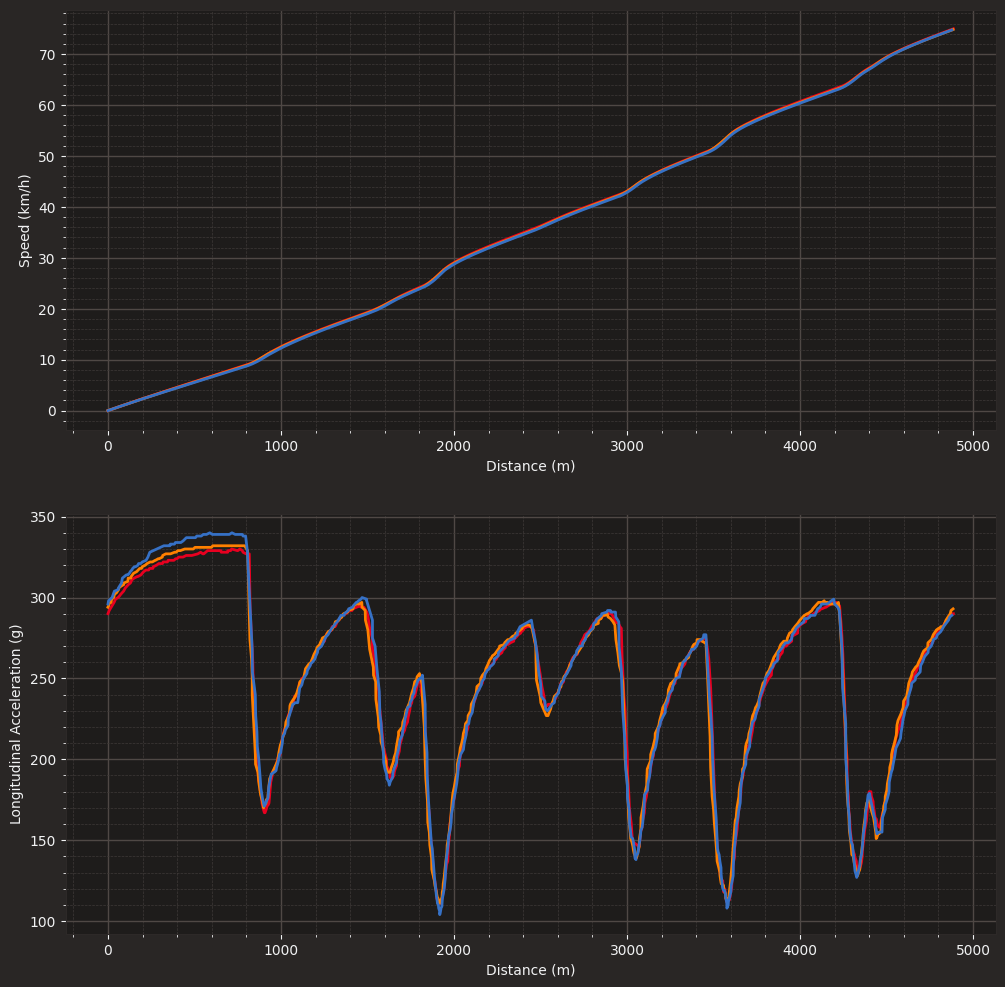

In [99]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

for i in indices:
    driver = drivers_fastest_laps[i]
    telemetry_d = driver.telemetry
    driver_color = '#' + results.loc[results['Abbreviation'] == driver.Driver, 'TeamColor'].iloc[0]
    time = telemetry_d['Time'] / np.timedelta64(1, 's')

    axes[0].plot(telemetry_d['Distance'], time, color=driver_color, linewidth = 2)
    axes[0].set(xlabel = "Distance (m)", ylabel = "Speed (km/h)")

    axes[1].plot(telemetry_d['Distance'], telemetry_d['Speed'], color=driver_color, linewidth = 2)
    axes[1].set(xlabel = "Distance (m)", ylabel = "Longitudinal Acceleration (g)")

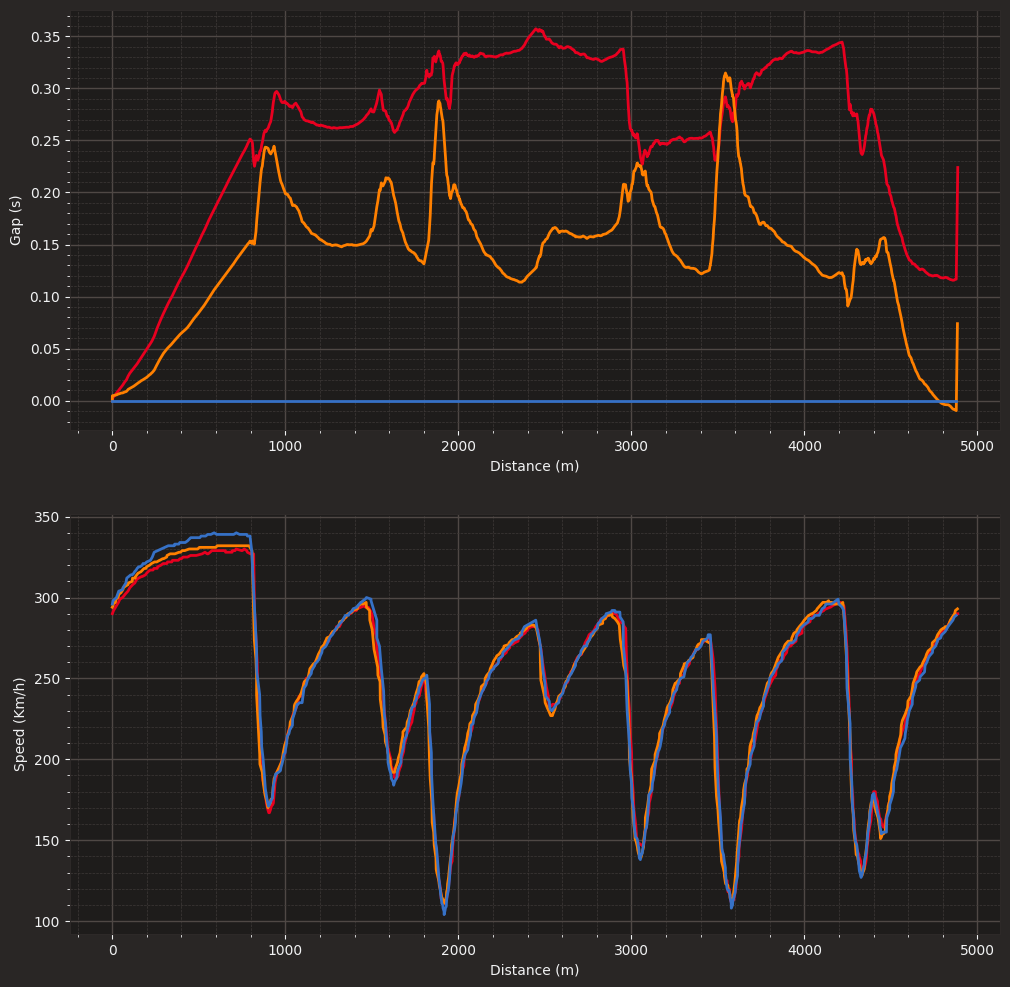

In [131]:
from scipy.interpolate import CubicSpline

# Function to interpolate distances
def interpolate_distances(data, common_distances):
    # Convert the 'Time' column to total seconds
    time_in_seconds = data['Time'] / np.timedelta64(1, 's')
    # Interpolate the time values at the common distances
    interpolated_times = np.interp(common_distances, data['Distance'], time_in_seconds)
    return pd.Series(interpolated_times)

# def interpolate_distances(data, common_distances):
#     # Convert the 'Time' column to total seconds
#     time_in_seconds = data['Time'].dt.total_seconds()
#     # Create a cubic spline interpolation of the time values at the given distances
#     cs = CubicSpline(data['Distance'], time_in_seconds)
#     # Evaluate the spline at the common distances
#     interpolated_times = cs(common_distances)
#     return pd.Series(interpolated_times)


fastest_driver = drivers_fastest_laps[0].telemetry
fastest_lap = (drivers_fastest_laps[0].LapTime / np.timedelta64(1, 's'))

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

data = []
for i in indices:
    driver = drivers_fastest_laps[i]
    telemetry_d = driver.telemetry
    driver_color = '#' + results.loc[results['Abbreviation'] == driver.Driver, 'TeamColor'].iloc[0]
    time = telemetry_d['Time'] / np.timedelta64(1, 's')
    lap_time = (driver.LapTime / np.timedelta64(1, 's'))

    # Create a common set of distances (union of all distances)
    common_distances = np.union1d(fastest_driver['Distance'], telemetry_d['Distance'])

    # Interpolate time values for each driver at the common distances
    driver1_interpolated_times = interpolate_distances(fastest_driver, common_distances)
    driver2_interpolated_times = interpolate_distances(telemetry_d, common_distances)

    # Calculate the time gaps (in seconds)
    time_gaps = (driver2_interpolated_times - driver1_interpolated_times)

    # Create a DataFrame to store the gaps and distances
    
    axes[0].plot(common_distances, time_gaps, color=driver_color, linewidth = 2)
    axes[0].set(xlabel = "Distance (m)", ylabel = "Gap (s)")

    axes[1].plot(telemetry_d['Distance'], telemetry_d['Speed'], color=driver_color, linewidth = 2)
    axes[1].set(xlabel = "Distance (m)", ylabel = "Speed (Km/h)")


    


          Distance   TimeGap  SpeedDifference
0         0.132035  0.004652        -1.701769
1         0.426152  0.004674       -10.117729
2         0.518030  0.004680       -12.386996
3         0.720268  0.004695       -16.808795
4         0.798865  0.004701       -18.321680
...            ...       ...              ...
34574  4883.165522 -0.009759         6.264162
34575  4883.449439 -0.009773         6.308065
34576  4883.733356 -0.009786         6.347258
34577  4884.017273 -0.009800         6.381571
34578  4884.301189 -0.009813         6.410835

[34579 rows x 3 columns]


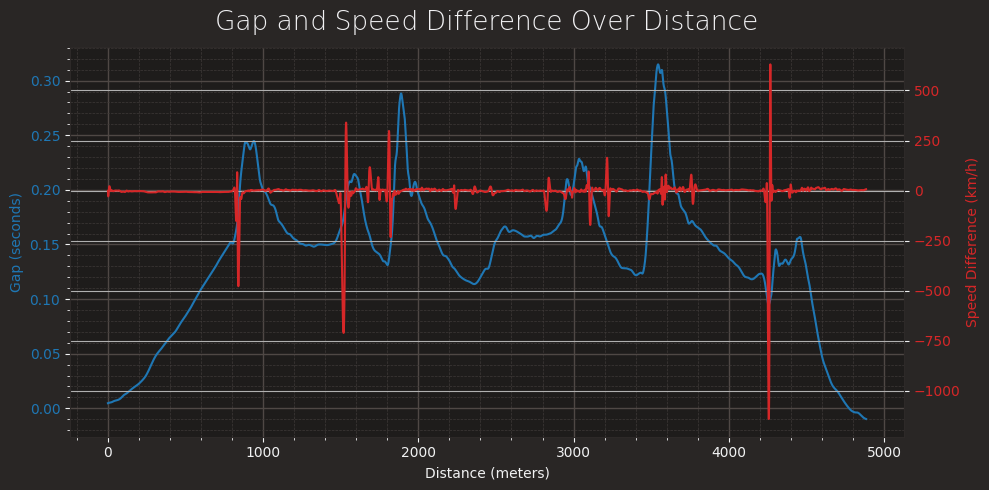

In [129]:
# weird interpolation
from scipy.interpolate import CubicSpline
# Function to refine distances using speed
def refine_distances(data):
    refined_distances = []
    for i in range(len(data) - 1):
        start_time = data['Time'].iloc[i].total_seconds()
        end_time = data['Time'].iloc[i + 1].total_seconds()
        start_distance = data['Distance'].iloc[i]
        end_distance = data['Distance'].iloc[i + 1]
        speed = data['Speed'].iloc[i]
        
        refined_distances.append(start_distance)
        time_interval = end_time - start_time
        num_points = int(time_interval / (1 / speed))  # Adjust the factor based on speed
        
        for j in range(1, num_points):
            fraction = j / num_points
            interpolated_distance = start_distance + fraction * (end_distance - start_distance)
            refined_distances.append(interpolated_distance)
    
    refined_distances.append(data['Distance'].iloc[-1])
    return np.array(refined_distances)


# Sample data for demonstration (replace with actual data)
driver1_data = drivers_fastest_laps[0].telemetry

driver2_data = drivers_fastest_laps[1].telemetry


# Refine distances for each driver
refined_distances_driver1 = refine_distances(driver1_data)
refined_distances_driver2 = refine_distances(driver2_data)

# Create a common set of refined distances (union of all distances)
common_distances = np.union1d(refined_distances_driver1, refined_distances_driver2)

# Function to interpolate values using cubic spline
def interpolate_values(data, common_distances, column):
    # Convert the 'Time' column to total seconds for time interpolation
    values = data[column].dt.total_seconds() if column == 'Time' else data[column]
    # Create a cubic spline interpolation of the specified column values at the given distances
    cs = CubicSpline(data['Distance'], values)
    # Evaluate the spline at the common distances
    interpolated_values = cs(common_distances)
    return pd.Series(interpolated_values)

# Interpolate time and speed values for each driver at the common distances
driver1_interpolated_times = interpolate_values(driver1_data, common_distances, 'Time')
driver2_interpolated_times = interpolate_values(driver2_data, common_distances, 'Time')
driver1_interpolated_speeds = interpolate_values(driver1_data, common_distances, 'Speed')
driver2_interpolated_speeds = interpolate_values(driver2_data, common_distances, 'Speed')

# Calculate the time gaps (in seconds), reversing the order
time_gaps = driver2_interpolated_times - driver1_interpolated_times

# Calculate the speed differences
speed_differences = driver2_interpolated_speeds - driver1_interpolated_speeds

# Create a DataFrame to store the gaps, speed differences, and distances
gaps_df = pd.DataFrame({
    'Distance': common_distances,
    'TimeGap': time_gaps,
    'SpeedDifference': speed_differences
})

print(gaps_df)

# Visualization
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot time gaps
ax1.set_xlabel('Distance (meters)')
ax1.set_ylabel('Gap (seconds)', color='tab:blue')
ax1.plot(gaps_df['Distance'], gaps_df['TimeGap'], label='Gap (s)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for speed difference
ax2 = ax1.twinx()
ax2.set_ylabel('Speed Difference (km/h)', color='tab:red')
ax2.plot(gaps_df['Distance'], gaps_df['SpeedDifference'], label='Speed Difference (km/h)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and grid
plt.title('Gap and Speed Difference Over Distance')
fig.tight_layout()
plt.grid(True)
plt.show()

In [123]:
drivers_fastest_laps[0].telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-05-18 14:59:12.512,0 days 01:11:32.783000,,67.126667,0 days 00:00:00,10878,296,7,100,False,12,interpolation,0.518030,0.000106,OnTrack,-1609.890037,-1611.552146,786.294130
3,2024-05-18 14:59:12.556,0 days 01:11:32.827000,,67.126667,0 days 00:00:00.044000,10622,298,8,100,False,12,car,4.168889,0.000852,OnTrack,-1646.211892,-1613.540561,786.504569
4,2024-05-18 14:59:12.675,0 days 01:11:32.946000,,67.126667,0 days 00:00:00.163000,10707,299,8,100,False,12,pos,14.056222,0.002871,OnTrack,-1745.000000,-1619.000000,787.000000
5,2024-05-18 14:59:12.796,0 days 01:11:33.067000,27,67.126667,0 days 00:00:00.284000,10793,300,8,100,False,12,car,24.168889,0.004937,OnTrack,-1846.276089,-1624.672831,787.393873
6,2024-05-18 14:59:12.956,0 days 01:11:33.227000,27,67.037778,0 days 00:00:00.444000,10861,304,8,100,False,12,car,37.680000,0.007697,OnTrack,-1981.103119,-1632.208423,787.858561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2024-05-18 15:00:26.656,0 days 01:12:46.927000,44,1154.743611,0 days 00:01:14.144000,11269,282,7,100,False,10,pos,4829.321488,0.986515,OnTrack,-1050.000000,-1587.000000,784.000000
560,2024-05-18 15:00:26.836,0 days 01:12:47.107000,44,1150.710278,0 days 00:01:14.324000,11345,284,7,100,False,12,car,4843.537500,0.989419,OnTrack,-1226.969174,-1592.455876,784.599040
561,2024-05-18 15:00:27.015,0 days 01:12:47.286000,44,1145.926944,0 days 00:01:14.503000,11388,286,7,100,False,12,pos,4857.812737,0.992335,OnTrack,-1385.000000,-1597.000000,785.000000
562,2024-05-18 15:00:27.116,0 days 01:12:47.387000,44,1141.143611,0 days 00:01:14.604000,11432,288,7,100,False,12,car,4865.937500,0.993994,OnTrack,-1460.026965,-1600.623595,785.290790


In [124]:
drivers_fastest_laps[0].telemetry[['Time', 'Distance', 'RelativeDistance', 'Speed']]

,Time,Distance,RelativeDistance,Speed
2,0 days 00:00:00,0.518030,0.000106,296
3,0 days 00:00:00.044000,4.168889,0.000852,298
4,0 days 00:00:00.163000,14.056222,0.002871,299
5,0 days 00:00:00.284000,24.168889,0.004937,300
6,0 days 00:00:00.444000,37.680000,0.007697,304
...,...,...,...,...
559,0 days 00:01:14.144000,4829.321488,0.986515,282
560,0 days 00:01:14.324000,4843.537500,0.989419,284
561,0 days 00:01:14.503000,4857.812737,0.992335,286
562,0 days 00:01:14.604000,4865.937500,0.993994,288


In [106]:
drivers_fastest_laps[1].telemetry[['Time', 'Distance', 'RelativeDistance']]

,Time,Distance,RelativeDistance
2,0 days 00:00:00,0.132035,0.000027
3,0 days 00:00:00.057000,4.837894,0.000987
4,0 days 00:00:00.058000,4.920556,0.001004
5,0 days 00:00:00.218000,18.196184,0.003713
6,0 days 00:00:00.258000,21.531667,0.004394
...,...,...,...
557,0 days 00:01:14.179000,4832.400556,0.986073
558,0 days 00:01:14.318000,4843.479948,0.988334
559,0 days 00:01:14.619000,4867.845000,0.993306
560,0 days 00:01:14.678000,4872.660602,0.994288


In [104]:
telemetry_driver

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2024-05-18 14:59:12.512,0 days 01:11:32.783000,,67.126667,0 days 00:00:00,10878,296,7,100,False,12,interpolation,0.000106,OnTrack,-1609.890037,-1611.552146,786.294130,0.000000
3,2024-05-18 14:59:12.556,0 days 01:11:32.827000,,67.126667,0 days 00:00:00.044000,10622,298,8,100,False,12,car,0.000852,OnTrack,-1646.211892,-1613.540561,786.504569,3.642222
4,2024-05-18 14:59:12.675,0 days 01:11:32.946000,,67.126667,0 days 00:00:00.163000,10707,299,8,100,False,12,pos,0.002871,OnTrack,-1745.000000,-1619.000000,787.000000,13.525833
5,2024-05-18 14:59:12.796,0 days 01:11:33.067000,27,67.126667,0 days 00:00:00.284000,10793,300,8,100,False,12,car,0.004937,OnTrack,-1846.276089,-1624.672831,787.393873,23.609167
6,2024-05-18 14:59:12.956,0 days 01:11:33.227000,27,67.037778,0 days 00:00:00.444000,10861,304,8,100,False,12,car,0.007697,OnTrack,-1981.103119,-1632.208423,787.858561,37.120278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2024-05-18 15:00:26.656,0 days 01:12:46.927000,44,1154.743611,0 days 00:01:14.144000,11269,282,7,100,False,10,pos,0.986515,OnTrack,-1050.000000,-1587.000000,784.000000,4825.861944
560,2024-05-18 15:00:26.836,0 days 01:12:47.107000,44,1150.710278,0 days 00:01:14.324000,11345,284,7,100,False,12,car,0.989419,OnTrack,-1226.969174,-1592.455876,784.599040,4840.061944
561,2024-05-18 15:00:27.015,0 days 01:12:47.286000,44,1145.926944,0 days 00:01:14.503000,11388,286,7,100,False,12,pos,0.992335,OnTrack,-1385.000000,-1597.000000,785.000000,4854.282500
562,2024-05-18 15:00:27.116,0 days 01:12:47.387000,44,1141.143611,0 days 00:01:14.604000,11432,288,7,100,False,12,car,0.993994,OnTrack,-1460.026965,-1600.623595,785.290790,4862.362500


<b>Track dominance</b>

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


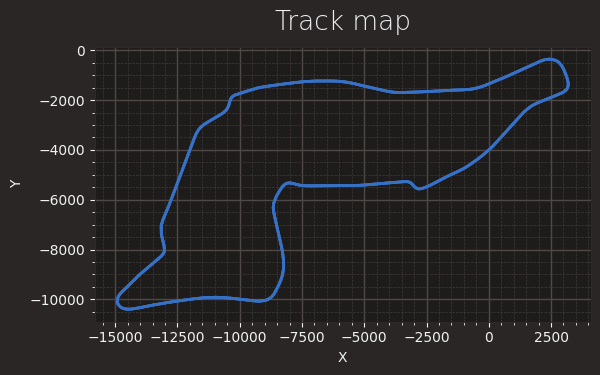

In [33]:
fig, ax = plt.subplots()

for i in indices:
    d = drivers_fastest_laps[index]
    telemetry_d = d.get_telemetry()

    driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]

    ax.plot(telemetry_d['X'], telemetry_d['Y'], color=driver_color, linewidth = 2)

# ax.plot(track_corners['X'], track_corners['Y'], 'ro')

# for i, (x, y, corner_number) in track_corners[['X', 'Y', 'Number']].iterrows():
#     ax.text(x, y, str(int(corner_number)), color='pink', fontsize=12, ha='right', va='bottom')


ax.set(xlabel = "X", ylabel = "Y", title="Track map")

ax.set_aspect('equal', adjustable='box')



In [34]:
drivers_fastest_laps[0].get_telemetry()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-05-18 14:59:12.512,0 days 01:11:32.783000,,67.126667,0 days 00:00:00,10878,296,7,100,False,12,interpolation,0.518030,0.000106,OnTrack,-1609.890037,-1611.552146,786.294130
3,2024-05-18 14:59:12.556,0 days 01:11:32.827000,,67.126667,0 days 00:00:00.044000,10622,298,8,100,False,12,car,4.168889,0.000852,OnTrack,-1646.211892,-1613.540561,786.504569
4,2024-05-18 14:59:12.675,0 days 01:11:32.946000,,67.126667,0 days 00:00:00.163000,10707,299,8,100,False,12,pos,14.056222,0.002871,OnTrack,-1745.000000,-1619.000000,787.000000
5,2024-05-18 14:59:12.796,0 days 01:11:33.067000,27,67.126667,0 days 00:00:00.284000,10793,300,8,100,False,12,car,24.168889,0.004937,OnTrack,-1846.276089,-1624.672831,787.393873
6,2024-05-18 14:59:12.956,0 days 01:11:33.227000,27,67.037778,0 days 00:00:00.444000,10861,304,8,100,False,12,car,37.680000,0.007697,OnTrack,-1981.103119,-1632.208423,787.858561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2024-05-18 15:00:26.656,0 days 01:12:46.927000,44,1154.743611,0 days 00:01:14.144000,11269,282,7,100,False,10,pos,4829.321488,0.986515,OnTrack,-1050.000000,-1587.000000,784.000000
560,2024-05-18 15:00:26.836,0 days 01:12:47.107000,44,1150.710278,0 days 00:01:14.324000,11345,284,7,100,False,12,car,4843.537500,0.989419,OnTrack,-1226.969174,-1592.455876,784.599040
561,2024-05-18 15:00:27.015,0 days 01:12:47.286000,44,1145.926944,0 days 00:01:14.503000,11388,286,7,100,False,12,pos,4857.812737,0.992335,OnTrack,-1385.000000,-1597.000000,785.000000
562,2024-05-18 15:00:27.116,0 days 01:12:47.387000,44,1141.143611,0 days 00:01:14.604000,11432,288,7,100,False,12,car,4865.937500,0.993994,OnTrack,-1460.026965,-1600.623595,785.290790


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


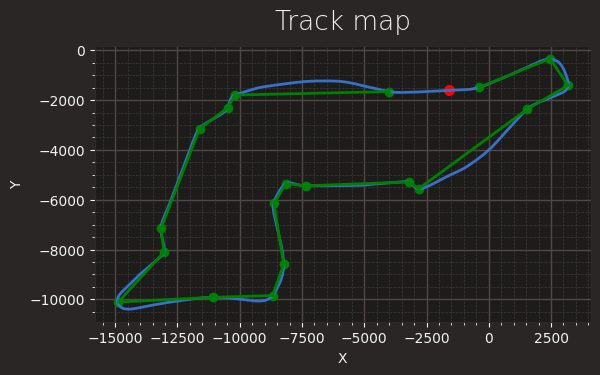

In [35]:
fig, ax = plt.subplots()

index = 0
d = drivers_fastest_laps[index]
telemetry_d = d.get_telemetry()
driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]
ax.plot(telemetry_d['X'], telemetry_d['Y'], color=driver_color, linewidth = 2)

ax.scatter(telemetry_d['X'].iloc[0], telemetry_d['Y'].iloc[0], color='red', linewidth = 2)


# for i, (x, y, corner_number) in track_corners[['X', 'Y', 'Number']].iterrows():
#     ax.text(x, y, str(int(corner_number)), color='pink', fontsize=12, ha='right', va='bottom')

xs = track_corners['X']
ys = track_corners['Y']

ax.plot(xs, ys, color='green', linewidth = 2)
ax.scatter(xs, ys, color='green')


ax.set(xlabel = "X", ylabel = "Y", title="Track map")

ax.set_aspect('equal', adjustable='box')

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


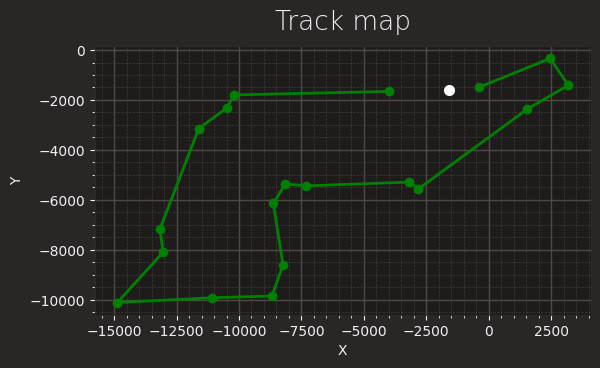

In [51]:
ml = track_data.marshal_lights
ms = track_data.marshal_sectors

fig, ax = plt.subplots()

index = 0
d = drivers_fastest_laps[index]
telemetry_d = d.get_telemetry()
driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]
#ax.plot(telemetry_d['X'], telemetry_d['Y'], color=driver_color, linewidth = 2)

ax.scatter(telemetry_d['X'].iloc[0], telemetry_d['Y'].iloc[0], color='white', linewidth = 2)


# for i, (x, y, corner_number) in track_corners[['X', 'Y', 'Number']].iterrows():
#     ax.text(x, y, str(int(corner_number)), color='pink', fontsize=12, ha='right', va='bottom')
#corners
ax.plot(track_corners['X'], track_corners['Y'], color='green', linewidth = 2)
ax.scatter(track_corners['X'], track_corners['Y'], color='green')
#marshall lights
# ax.plot(ml['X'], ml['Y'], color='red', linewidth = 2)
# ax.scatter(ml['X'], ml['Y'], color='red')
#marshall sectors
# ax.plot(ms['X'], ms['Y'], color='blue', linewidth = 2)
# ax.scatter(ms['X'], ms['Y'], color='blue')


ax.set(xlabel = "X", ylabel = "Y", title="Track map")

ax.set_aspect('equal', adjustable='box')

In [118]:
telemetry_driver

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2024-05-18 14:59:12.512,0 days 01:11:32.783000,,67.126667,0 days 00:00:00,10878,296,7,100,False,12,interpolation,0.000106,OnTrack,-1609.890037,-1611.552146,786.294130,0.000000
3,2024-05-18 14:59:12.556,0 days 01:11:32.827000,,67.126667,0 days 00:00:00.044000,10622,298,8,100,False,12,car,0.000852,OnTrack,-1646.211892,-1613.540561,786.504569,3.642222
4,2024-05-18 14:59:12.675,0 days 01:11:32.946000,,67.126667,0 days 00:00:00.163000,10707,299,8,100,False,12,pos,0.002871,OnTrack,-1745.000000,-1619.000000,787.000000,13.525833
5,2024-05-18 14:59:12.796,0 days 01:11:33.067000,27,67.126667,0 days 00:00:00.284000,10793,300,8,100,False,12,car,0.004937,OnTrack,-1846.276089,-1624.672831,787.393873,23.609167
6,2024-05-18 14:59:12.956,0 days 01:11:33.227000,27,67.037778,0 days 00:00:00.444000,10861,304,8,100,False,12,car,0.007697,OnTrack,-1981.103119,-1632.208423,787.858561,37.120278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2024-05-18 15:00:26.656,0 days 01:12:46.927000,44,1154.743611,0 days 00:01:14.144000,11269,282,7,100,False,10,pos,0.986515,OnTrack,-1050.000000,-1587.000000,784.000000,4825.861944
560,2024-05-18 15:00:26.836,0 days 01:12:47.107000,44,1150.710278,0 days 00:01:14.324000,11345,284,7,100,False,12,car,0.989419,OnTrack,-1226.969174,-1592.455876,784.599040,4840.061944
561,2024-05-18 15:00:27.015,0 days 01:12:47.286000,44,1145.926944,0 days 00:01:14.503000,11388,286,7,100,False,12,pos,0.992335,OnTrack,-1385.000000,-1597.000000,785.000000,4854.282500
562,2024-05-18 15:00:27.116,0 days 01:12:47.387000,44,1141.143611,0 days 00:01:14.604000,11432,288,7,100,False,12,car,0.993994,OnTrack,-1460.026965,-1600.623595,785.290790,4862.362500


In [46]:
track_data.marshal_sectors

,X,Y,Number,Letter,Angle,Distance
0,-1476.580199,-1602.516872,1,,93.938304,4857.812737
1,-3810.232208,-1682.417976,2,,-93.887266,220.374287
2,-6381.647538,-1230.000312,3,,89.983856,475.904008
3,-8790.129017,-1428.168266,4,,97.961810,735.587662
4,-11600.604112,-3133.246486,5,,140.515441,1072.406862
5,-12764.694714,-6029.841794,6,,-201.151573,1391.234000
6,-13064.279450,-8147.004959,7,,-30.250227,1613.045459
7,-14311.429476,-9294.035601,8,,134.425602,1782.785965
8,-11426.908257,-9936.449327,9,,95.583780,2257.199304
9,-9338.169593,-10066.418698,10,,-92.387076,2456.735067


In [39]:
# cycle the dataframe

for index, lap in drivers_laps[0].iterrows():
    print(lap.Driver)

for lap in drivers_laps[0].itertuples():
    print(lap.Driver)

VER
VER
VER
VER
VER
VER
VER
VER
VER
VER
VER
VER


In [40]:
d_laps = drivers_laps[0]
print(d_laps.iloc[0])

Time                      0 days 00:20:14.072000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:16.013000
LapNumber                                    2.0
Stint                                        1.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:23.949000
Sector2Time               0 days 00:00:26.337000
Sector3Time               0 days 00:00:25.727000
Sector1SessionTime        0 days 00:19:22.008000
Sector2SessionTime        0 days 00:19:48.345000
Sector3SessionTime        0 days 00:20:14.072000
SpeedI1                                    230.0
SpeedI2                                    261.0
SpeedFL                                    287.0
SpeedST                                    297.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            